In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [2]:
file = "mrielectron10x100_412"
data =np.load(file+".npz")

In [3]:
t = data["t"]
xv = data["xv"]
eb = data["EB"]
Nx = data["Nx"]
Nz = data["Nz"]
Lx = data["Lx"]
Lz = data["Lz"]

In [4]:
t
np.shape(eb)

(2, 2, 10, 3, 11)

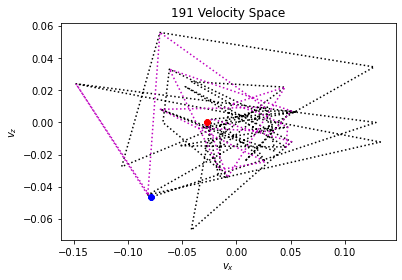

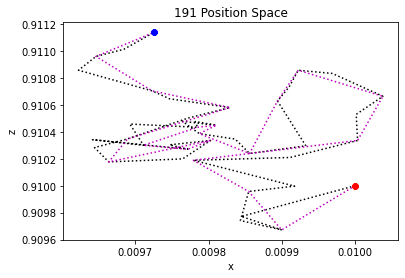

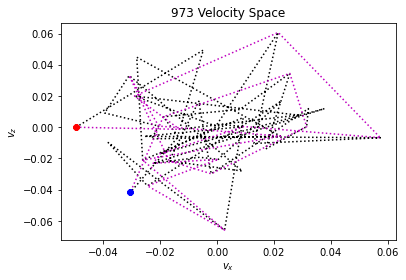

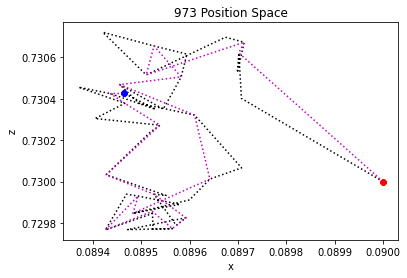

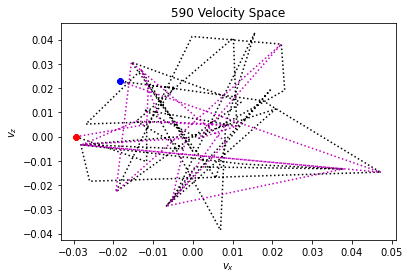

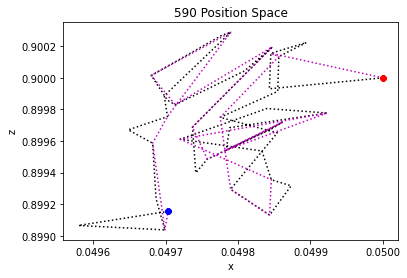

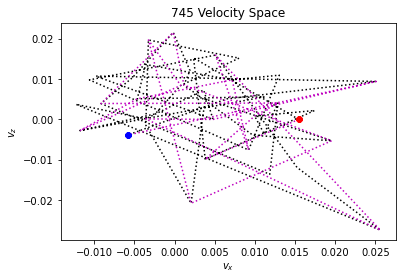

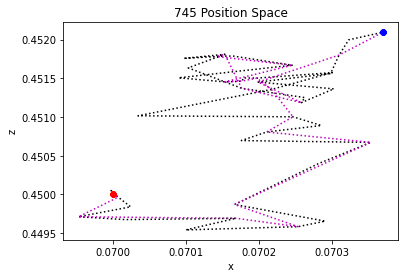

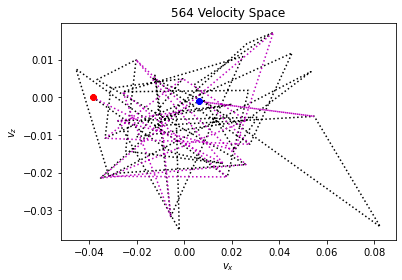

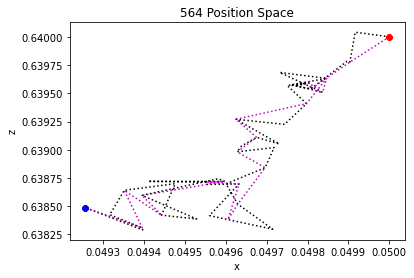

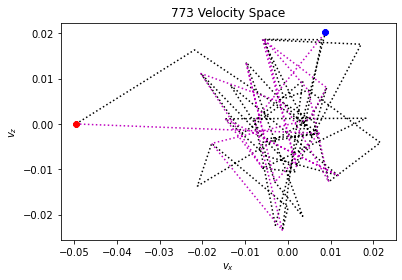

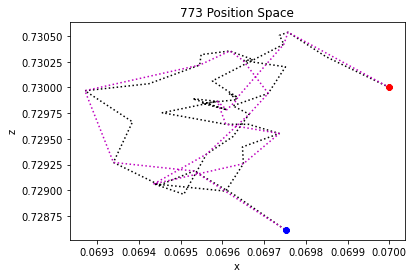

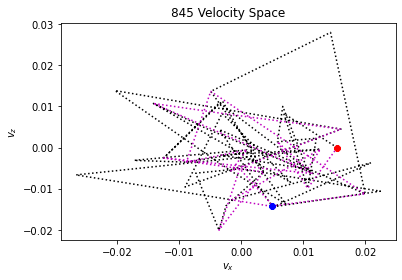

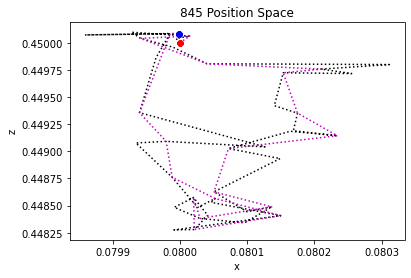

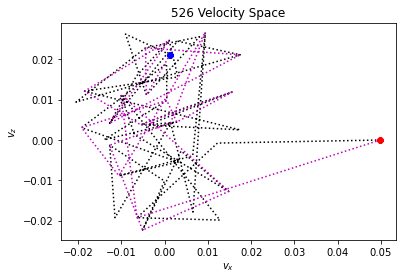

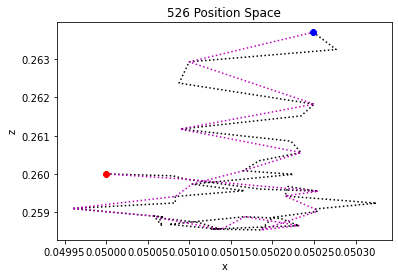

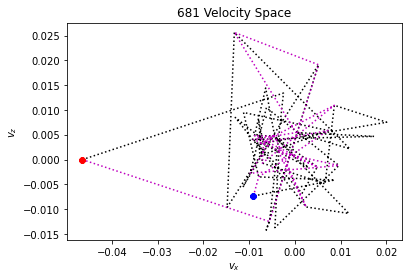

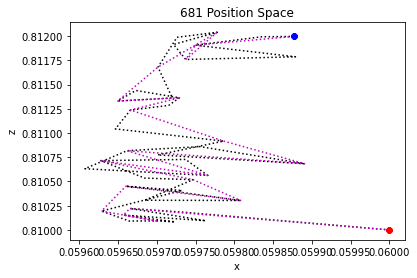

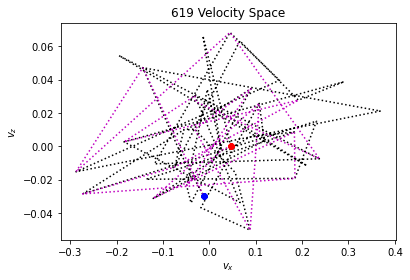

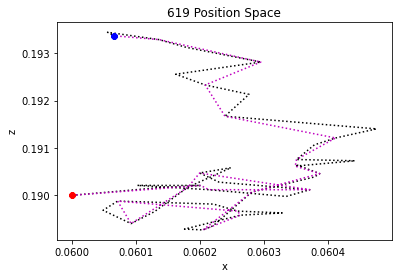

In [7]:
['m8','r8','b8','g8','k8']
r = 2
for j in np.random.choice(np.arange(10*100),size=10):
    
    plt.figure()
    # ax[0].plot(xv[0,j,0,:],xv[0,j,2,:],'k:')
    plt.plot(xv[1,j,0,::],xv[1,j,2,::],'k:')
    plt.plot(xv[1,j,0,::r],xv[1,j,2,::r],'m:')
    for i in range(np.shape(eb)[-1]):
        if i == 0:
            # ax[0].plot(xv[0,j,0,i],xv[0,j,2,i],'r8')
            plt.plot(xv[1,j,0,i],xv[1,j,2,i],'r8')
        if i == np.shape(eb)[-1]-1:
            # ax[0].plot(xv[0,j,0,i],xv[0,j,2,i],'b8')
            plt.plot(xv[1,j,0,i],xv[1,j,2,i],'b8')
    
    plt.xlabel("$v_x$")
    plt.ylabel("$v_z$")
    # ax[0].set_xlabel("$x$")
    # ax[0].set_ylabel("$z$")
    plt.title("Particle "+str(j)+" Velocity Space")

    plt.figure()
    plt.plot(xv[0,j,0,::],xv[0,j,2,::],'k:')
    plt.plot(xv[0,j,0,::r],xv[0,j,2,::r],'m:')
    for i in range(np.shape(eb)[-1]):
        if i == 0:
            plt.plot(xv[0,j,0,i],xv[0,j,2,i],'r8')
        if i == np.shape(eb)[-1]-1:
            plt.plot(xv[0,j,0,i],xv[0,j,2,i],'b8')
    plt.xlabel("x")
    plt.ylabel("z")
    plt.title("Particle "+str(j)+" Position Space")
    
    

Text(0.5, 1.0, 'All Particle Positions')

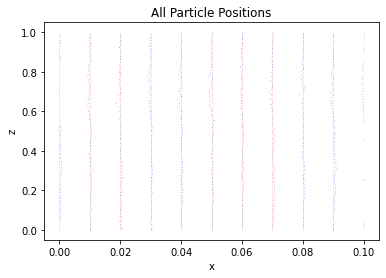

In [11]:
plt.plot(xv[0,:,0,0],xv[0,:,2,0],'sr',markersize=0.05)
plt.plot(xv[0,:,0,-1],xv[0,:,2,-1],'sb',markersize=0.05)
plt.xlabel('x')
plt.ylabel('z')
plt.title("All Particle Positions")

In [45]:
from scipy.fft import fftfreq

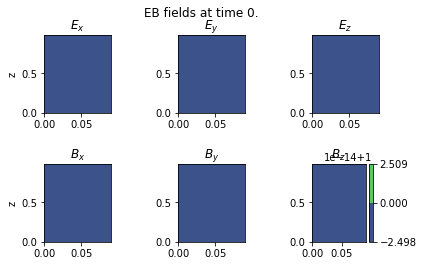

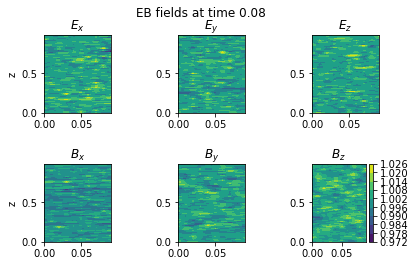

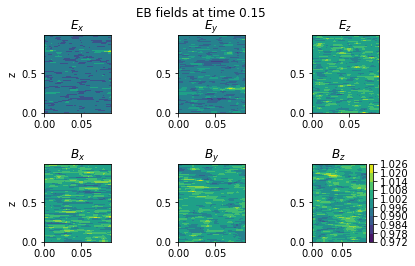

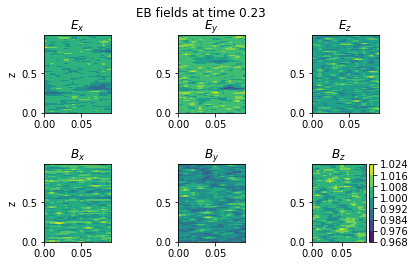

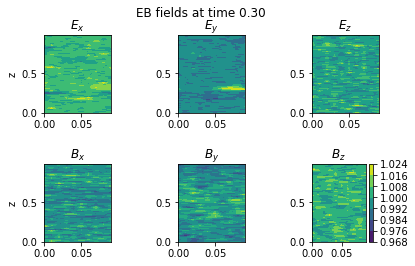

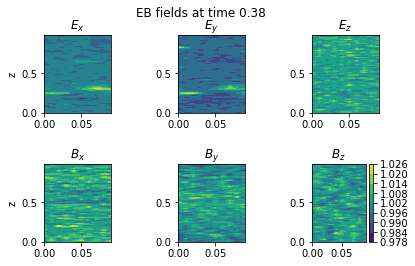

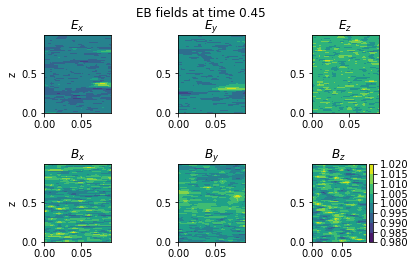

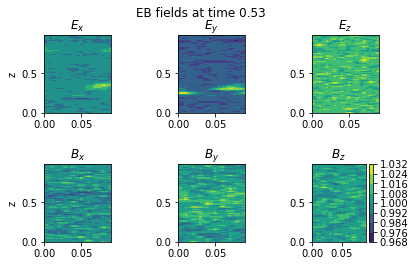

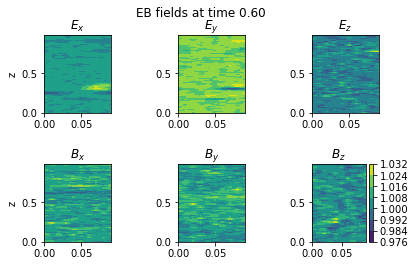

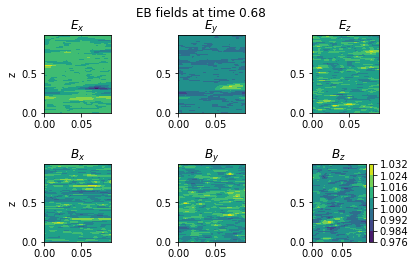

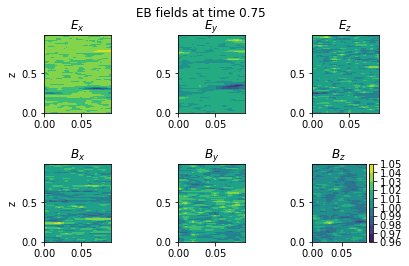

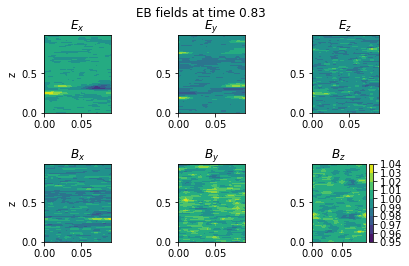

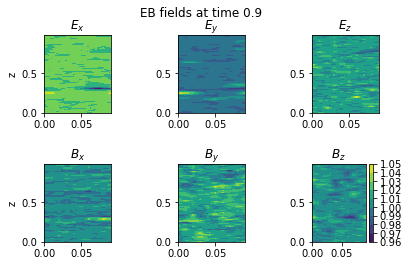

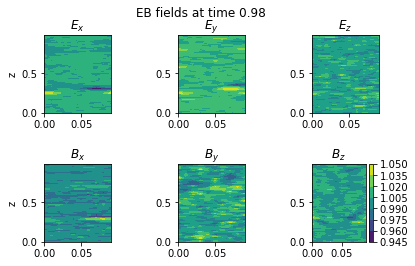

In [18]:
xgrid = np.arange(0,Lx,Lx/Nx)
zgrid = np.arange(0,Lz,Lz/Nz)

r = 3
fs = ["E","B"]
inds = ["x","y","z"]
for i in range(0,np.shape(eb)[-1],r):
    fig,ax = plt.subplots(2,3)
    fig.tight_layout(pad=3)
    for j in range(2):
        for k in range(3):
            cf = ax[j,k].contourf(xgrid,zgrid,eb[j,:,:,k,i].transpose())
            if i == 1:
                ax[j,k].set_xlabel('x')
            if k == 0:
                ax[j,k].set_ylabel('z')

            ax[j,k].set_title("$"+fs[j]+"_"+inds[k]+"$")
            if j == 1 and k == 2:
                plt.colorbar(cf)
    fig.suptitle("EB fields at time "+np.format_float_positional(t[i],2))

    

In [50]:
np.amax(eb[1,:,:,1,:])

0.0002915737592344857

In [8]:
file = "mri13"
data =np.load(file+".npz")

In [9]:
t = data["t"]
xv = data["xv"]
eb = data["EB"]
Nx = data["Nx"]
Nz = data["Nz"]
Lx = data["Lx"]
Lz = data["Lz"]

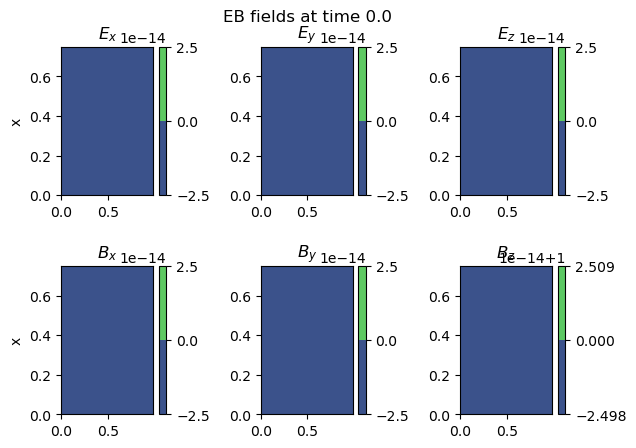

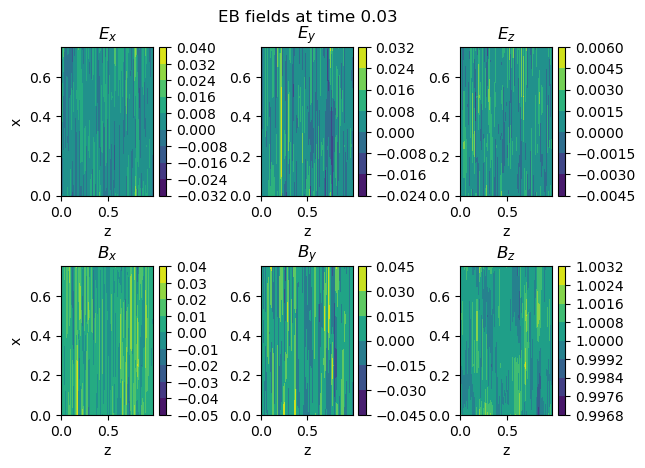

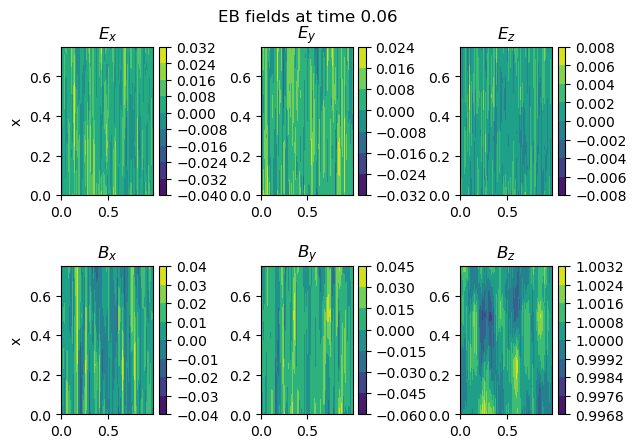

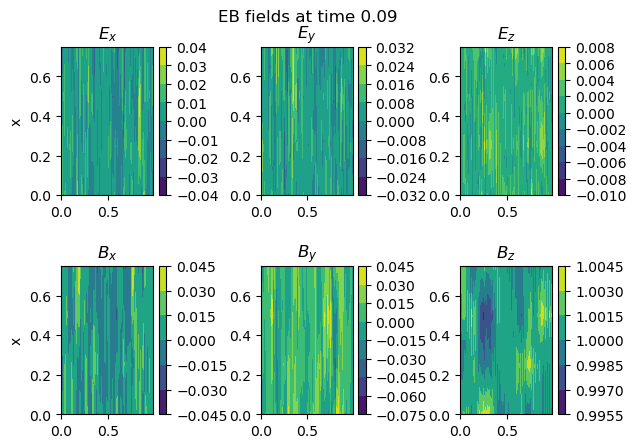

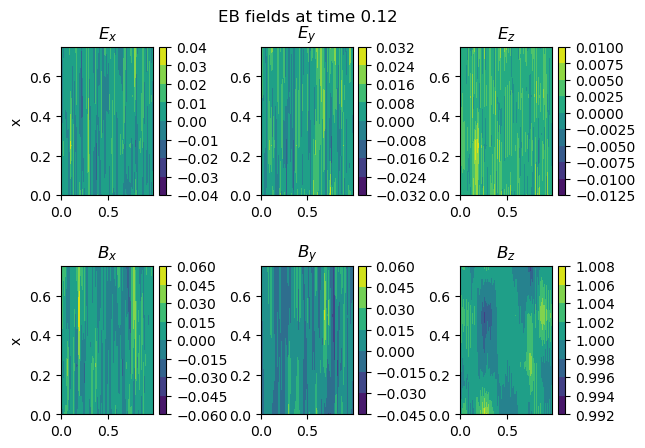

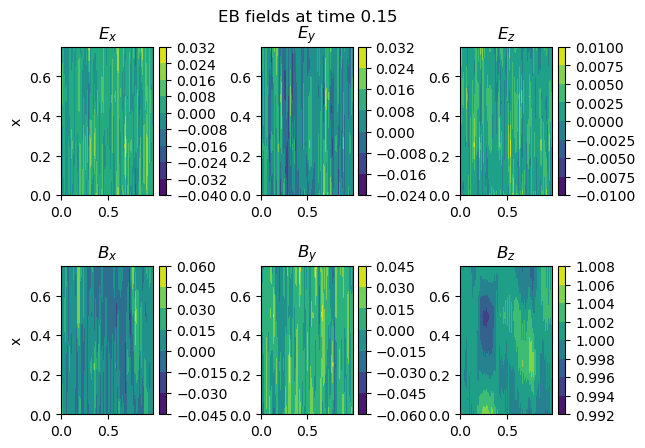

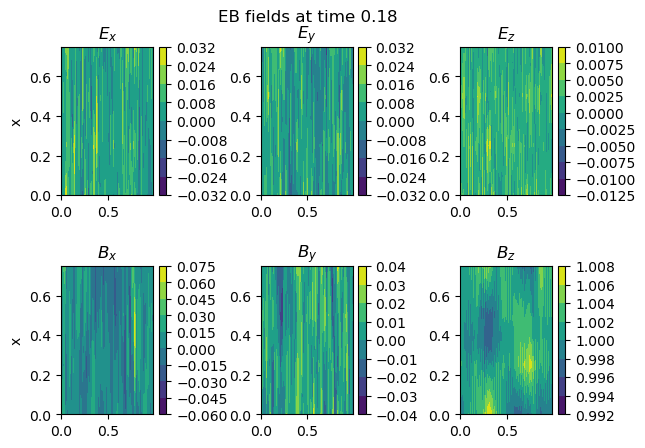

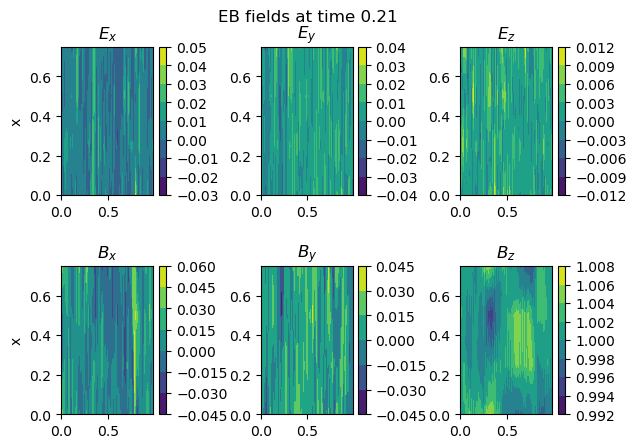

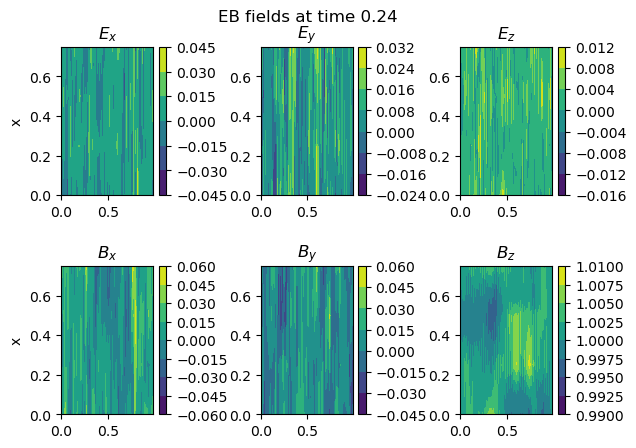

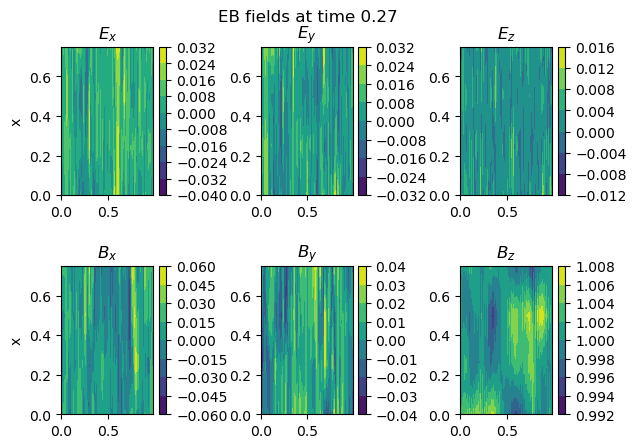

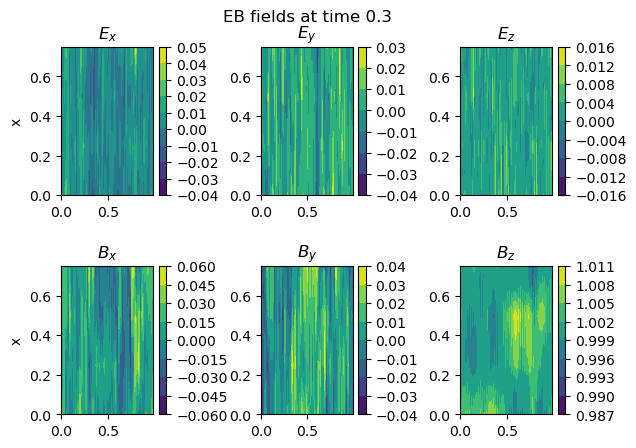

In [10]:
xgrid = np.arange(0,Lx,Lx/Nx)
zgrid = np.arange(0,Lz,Lz/Nz)

fs = ["E","B"]
inds = ["x","y","z"]
for i in range(11):
    fig,ax = plt.subplots(2,3)
    fig.tight_layout(pad=3)
    for j in range(2):
        for k in range(3):
            cf = ax[j,k].contourf(zgrid,xgrid,eb[j,:,:,k,i])
            if i == 1:
                ax[j,k].set_xlabel('z')
            if k == 0:
                ax[j,k].set_ylabel('x')

            ax[j,k].set_title("$"+fs[j]+"_"+inds[k]+"$")
            plt.colorbar(cf)
    fig.suptitle("EB fields at time "+str(t[i]))

    